# Computer vision - Bordes (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. Pantalla verde
2. Transformaciones geométricas
3. Filtros
4. **Bordes**
5. Hough
6. Detección de esquinas

## Resumen
En esta parte del ejercicio encontraremos los bordes de un objeto dentro de una imagen.

Seguiremos los siguientes pasos:
1. Cargar imagen
2. Encontrar bordes
3. Recuadores contenedores
4. Elipses contenedoras

## 1 - Cargar imagen

Importamos las librerías necesarias y cargamos la imagen con la que trabajaremos.

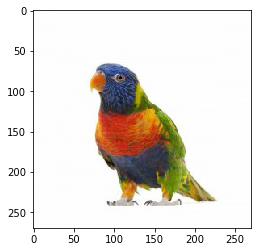

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread("photos/bird.jpg")
image = np.copy(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

## 2 - Encontrar bordes
Primero utilizaremos la función treshold con type cv2.THRESH_BINARY_INV para eliminar la parte blanca de la imagen.

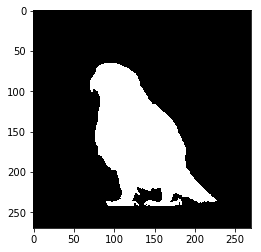

In [3]:
### SOLUCIÓN
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
retval,binary_image = cv2.threshold(gray,230,255,cv2.THRESH_BINARY_INV)
plt.imshow(binary_image, cmap='gray')

Ahora usaremos la [función findContours](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=findcontours#cv2.findContours) para encontrar los bordes de la imagen y la [función drawContours](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html#void%20drawContours) para dibujarlos.  

In [5]:
retval,contours,hierarchy = cv2.findContours(binary_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

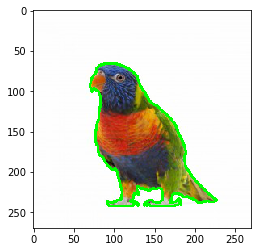

In [7]:
image_copy = np.copy(image)
#Dibujo los bordes de verde
all_contours = cv2.drawContours(image_copy,contours,-1,(0,255,0),2)
plt.imshow(all_contours)

## 3 - Recuadros contenedores
Podemos encontrar un rectángulo contenedor de los objetos encontrados con la siguiente función:

In [ ]:
x,y,w,h = cv2.boundingRect(contours[0])

Dibujar un rectángulo a partir de las dimensiones y posición encontradas.

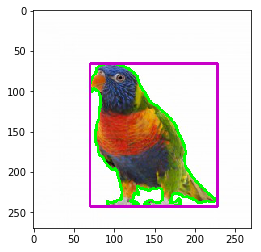

In [10]:
### SOLUCIÓN
box_image = cv2.rectangle(all_contours, (x,y), (x+w,y+h), (0,0,255),2)
plt.imshow(box_image)

## 4 - Elipse contenedoras
De forma análoga, podemos encontrar una elipse que contenga el objeto. Esto nos puede ser útil para encontrar la orientación de un objeto por ejemplo.

In [ ]:
(x,y), (MA,ma), angle = cv2.fitEllipse(contours[0])
print(x,y,MA,ma)
ellipse = cv2.fitEllipse(contours[0])

131.3838653564453 165.1541748046875 114.0268325805664 194.22938537597656


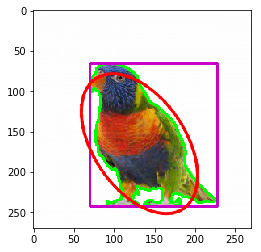

In [15]:
### SOLUCIÓN
elipse_image = cv2.ellipse(all_contours, ellipse, (255,0,0), 2,cv2.LINE_AA)
plt.imshow(elipse_image)